<a href="https://colab.research.google.com/github/AmanKabra/OB-Semantic-Analysis/blob/master/OB_Semantic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Package installations and loading

In [ ]:
!pip3 install -qq twint
!pip install -qq whatthelang
!pip install nest_asyncio
!pip install tweet-preprocessor
!pip install --upgrade gensim
!pip install transformers
!pip install contractions
!pip install tensorflow
!pip install ktrain
!pip install simpletransformers
!pip install numba

     |████████████████████████████████| 1.2MB 7.4MB/s 
     |████████████████████████████████| 245kB 19.6MB/s 
     |████████████████████████████████| 225kB 21.4MB/s 
     |████████████████████████████████| 266kB 25.8MB/s 
     |████████████████████████████████| 153kB 31.6MB/s 
     |████████████████████████████████| 235kB 27.2MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 788kB 4.6MB/s 
     |████████████████████████████████| 102kB 9.2MB/s 
     |████████████████████████████████| 245kB 20.1MB/s 
     |████████████████████████████████| 24.2MB 144kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 1.1MB 4.7MB/s 
     |████████████████████████████████| 3.0MB 28.5MB/s 
     |████████████████████████████████| 890kB 40.4MB/s 
     |████████████████████████████████| 1.1MB 27.8MB/s 
  Created wheel for sacremoses: filename=sacrem

In [ ]:
# Import Library
import twint
import pandas as pd
import numpy as np
import nest_asyncio
from multiprocessing import Process
nest_asyncio.apply()
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import json
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor.api as p
from preprocessor.api import clean, tokenize, parse
import seaborn as sns   # for charts
sns.set_style("whitegrid");   # chart background style
plt.rcParams['figure.dpi'] = 360   # for high res chart output
import spacy   # for tokenising text
from spacy.lang.en import English  # for tokenising text
nlp = English()   # for tokenising text
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import torch
import tensorflow as tf
from transformers import BertTokenizer
import contractions
from sklearn.model_selection import train_test_split
import ktrain
from ktrain import text
from simpletransformers.classification import ClassificationModel
import sklearn
import itertools

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words("english"))
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Scrape: The telegraph ,The times, The Economist, The Guardian, BBC news UK, The Independent, and The Financial Times.

Handles: ['Telegraph', 'thetimes','TheEconomist','guardiannews','BBCNews','Independent','FinancialTimes']


#Data Scraping

##2020 data

In [ ]:
2+2

In [ ]:
from numba import jit, cuda 

@jit                          
def func2(user): 
  c = twint.Config()
  c.Store_object = True
  c.Pandas = True
  c.Username = user
  c.Since = "2020-01-01"
  c.Until = "2020-09-01"
  twint.run.Search(c)

In [ ]:
func2("GMB")

In [ ]:
twint.storage.panda.Tweets_df.to_csv('GMB.csv')

In [ ]:
Telegraph = pd.DataFrame()
thetimes = pd.DataFrame()
TheEconomist = pd.DataFrame()
guardiannews = pd.DataFrame()
BBCNews = pd.DataFrame()
Independent = pd.DataFrame()
FinancialTimes = pd.DataFrame()

In [ ]:
c = twint.Config()
c.Store_object = True
c.Pandas = True
c.Username = "itvnews"
c.Since = "2020-01-01"
c.Until = "2020-09-01"
twint.run.Search(c)

In [ ]:
twint.storage.panda.Tweets_df.tail(5)

In [ ]:
 FinancialTimes = FinancialTimes.append(twint.storage.panda.Tweets_df, ignore_index = True)
 FinancialTimes.to_csv('FinancialTimes.csv')

In [ ]:
 Independent = Independent.append(twint.storage.panda.Tweets_df, ignore_index = True)
 Independent.to_csv('Independent.csv')

In [ ]:
 BBCNews = BBCNews.append(twint.storage.panda.Tweets_df, ignore_index = True)
 BBCNews.to_csv('BBCNews.csv')

In [ ]:
 guardiannews = guardiannews.append(twint.storage.panda.Tweets_df, ignore_index = True)
 guardiannews.to_csv('GuardianNews.csv')

In [ ]:
 TheEconomist = TheEconomist.append(twint.storage.panda.Tweets_df, ignore_index = True)
 TheEconomist.to_csv('TheEconomist.csv')

In [ ]:
 thetimes = thetimes.append(twint.storage.panda.Tweets_df, ignore_index = True)
 thetimes.to_csv('TheTimes.csv')

In [ ]:
 Telegraph = Telegraph.append(twint.storage.panda.Tweets_df, ignore_index = True)
 Telegraph.to_csv('Telegraph.csv')

##2019 data (pure non-covid)

In [ ]:
users = ['FinancialTimes','Independent','BBCNews','guardiannews','TheEconomist','thetimes','Telegraph',
         'DailyMailUK','DailyMirror','TheSun','itvnews','SkyNews','Daily_Express','GMB']

df2019 = pd.DataFrame()

def process(user):
  c = twint.Config()
  c.Store_object = True
  c.Pandas = True
  c.Username = user
  c.Since = "2019-10-01"
  c.Until = "2019-12-01"
  twint.run.Search(c)

for user in users:
  process(user)
  df2019 = df2019.append(twint.storage.panda.Tweets_df, ignore_index = True)

In [ ]:
df2019.to_csv('df2019.csv')

In [ ]:
#creating URL column
urlarray = []
for line in df2019["tweet"]:
  url = re.findall('((?:https?://)?(?:(?:www\.)?(?:[\da-z\.-]+)\.(?:[a-z]{2,6})|(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)|(?:(?:[0-9a-fA-F]{1,4}:){7,7}[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,7}:|(?:[0-9a-fA-F]{1,4}:){1,6}:[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,5}(?::[0-9a-fA-F]{1,4}){1,2}|(?:[0-9a-fA-F]{1,4}:){1,4}(?::[0-9a-fA-F]{1,4}){1,3}|(?:[0-9a-fA-F]{1,4}:){1,3}(?::[0-9a-fA-F]{1,4}){1,4}|(?:[0-9a-fA-F]{1,4}:){1,2}(?::[0-9a-fA-F]{1,4}){1,5}|[0-9a-fA-F]{1,4}:(?:(?::[0-9a-fA-F]{1,4}){1,6})|:(?:(?::[0-9a-fA-F]{1,4}){1,7}|:)|fe80:(?::[0-9a-fA-F]{0,4}){0,4}%[0-9a-zA-Z]{1,}|::(?:ffff(?::0{1,4}){0,1}:){0,1}(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])|(?:[0-9a-fA-F]{1,4}:){1,4}:(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])))(?::[0-9]{1,4}|[1-5][0-9]{4}|6[0-4][0-9]{3}|65[0-4][0-9]{2}|655[0-2][0-9]|6553[0-5])?(?:/[\w\.-]*)*/?)', line)
  urlarray.append(url)
df2019["URL"] = urlarray

#creating fuction to remove unwanted parts from COVID tweets
def remove_content(text):
  text = re.sub(r"http\S+", "", text) #remove urls
  text=re.sub(r'\S+\.com\S+','',text) #remove urls
  text=re.sub(r'\@\w+','',text) #remove mentions
  text =re.sub(r'\#\w+','',text) #remove hashtags
  text = contractions.fix(text) #replace contractions with full forms (eg. don't becomes do not)
  text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
  text = text.lower() #converts to lower case
  text = re.sub(r'\s+',' ', text) #remove extra white space
  return text

#calling the function
df2019['cleaned_tweets']=df2019['tweet'].apply(lambda x: remove_content(x))

In [ ]:
BBCNews = pd.read_csv("BBCNews.csv")
FinancialTimes = pd.read_csv("FinancialTimes.csv")
Independent = pd.read_csv("Independent.csv")
Telegraph = pd.read_csv("Telegraph.csv")
TheEconomist = pd.read_csv("TheEconomist.csv")
guardiannews = pd.read_csv("guardiannews.csv")
thetimes = pd.read_csv("thetimes.csv")

In [ ]:
BBCNews = BBCNews.append(df2019[df2019['username']=="BBCNews"],ignore_index=True)
FinancialTimes = FinancialTimes.append(df2019[df2019['username']=="FinancialTimes"],ignore_index=True)
Independent = Independent.append(df2019[df2019['username']=="Independent"],ignore_index=True)
Telegraph = Telegraph.append(df2019[df2019['username']=="Telegraph"],ignore_index=True)
TheEconomist = TheEconomist.append(df2019[df2019['username']=="TheEconomist"],ignore_index=True)
guardiannews = guardiannews.append(df2019[df2019['username']=="guardiannews"],ignore_index=True)
thetimes = thetimes.append(df2019[df2019['username']=="thetimes"],ignore_index=True)

In [ ]:
BBCNews.to_csv('BBCNews.csv')
FinancialTimes.to_csv('FinancialTimes.csv')
Independent.to_csv('Independent.csv')
Telegraph.to_csv('Telegraph.csv')
TheEconomist.to_csv('TheEconomist.csv')
guardiannews.to_csv('guardiannews.csv')
thetimes.to_csv('thetimes.csv')

In [ ]:
 df2019.to_csv('df2019.csv')

In [ ]:
from google.colab import files

In [ ]:
files.download('BBCNews.csv')
files.download('FinancialTimes.csv')
files.download('Independent.csv')
files.download('Telegraph.csv')
files.download('TheEconomist.csv')
files.download('guardiannews.csv')
files.download('thetimes.csv')

# Preprocessing and EDA

Scraping done.

We now proceed toward NLP.

Step 1: Data cleaning and preprocessing

In [ ]:
BBCNews = pd.read_csv("BBCNews.csv")
FinancialTimes = pd.read_csv("FinancialTimes.csv")
Independent = pd.read_csv("Independent.csv")
Telegraph = pd.read_csv("Telegraph.csv")
TheEconomist = pd.read_csv("TheEconomist.csv")
guardiannews = pd.read_csv("guardiannews.csv")
thetimes = pd.read_csv("thetimes.csv")

In [ ]:
fulldf = pd.DataFrame()

In [ ]:
fulldf = BBCNews
fulldf = fulldf.append(FinancialTimes, ignore_index = True)
fulldf = fulldf.append(Independent, ignore_index = True)
fulldf = fulldf.append(Telegraph, ignore_index = True)
fulldf = fulldf.append(TheEconomist, ignore_index = True)
fulldf = fulldf.append(guardiannews, ignore_index = True)
fulldf = fulldf.append(thetimes, ignore_index = True)

In [ ]:
df = fulldf[['tweet', 'hashtags','username','nlikes','nreplies','nretweets']]

In [ ]:
print(f"Total number of tweets: {len(df)}")

In [ ]:
# let's find out how many tweets contain a hashtag
tweets_with_hashtags = df.loc[df["tweet"].str.contains("#")]

# view the number of tweets that contain a hashtag
print(f"Number of tweets containing hashtags: {len(tweets_with_hashtags)}")

# view the tweets that contain a hashtag
tweets_with_hashtags

In [ ]:
# how many tweets contain a URL i.e. "http"?
tweets_with_URLs = df.loc[df["tweet"].str.contains("http")]

# view the number of tweets that contain a URL
print(f"Number of tweets containing URLs: {len(tweets_with_URLs)}")

# view the tweets that contain a URL
tweets_with_URLs

In [ ]:
# create a single string containing all the tweets, as this will be needed to be able to create a wordcloud
tweet_string = " ".join(tweet for tweet in df["tweet"])

# replace all the mentions (e.g. @Anurag_Gupta) from the tweets with '@USER'
tweet_string = re.sub(r'@\w+','@USER ', tweet_string)

# replace all the URLs with '_URL_'
tweet_string = re.sub(r'http\S+','_URL_ ', tweet_string)

# convert the text to lower case so, for example, instead of having "Be" and "be" included
# as 2 separate words, we'd only have "be"
tweet_string = tweet_string.lower()

# remove extra white spaces so there is only one space between words
tweet_string = re.sub(r'\s+',' ', tweet_string)

# view the first 200 elements of the string to check this worked as expected
tweet_string[0:200]

In [ ]:
# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=100, 
                             ).generate(tweet_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Trying another alternative (by putting empty space in place of URLs and Tags)

In [ ]:
# create a single string containing all the tweets, as this will be needed to be able to create a wordcloud
tweet_string = " ".join(tweet for tweet in df["tweet"])

# replace all the mentions (e.g. @Anurag_Gupta) from the tweets with '@USER'
tweet_string = re.sub(r'@\w+',' ', tweet_string)

# replace all the URLs with '_URL_'
tweet_string = re.sub(r'http\S+',' ', tweet_string)

# convert the text to lower case so, for example, instead of having "Be" and "be" included
# as 2 separate words, we'd only have "be"
tweet_string = tweet_string.lower()

# remove extra white spaces so there is only one space between words
tweet_string = re.sub(r'\s+',' ', tweet_string)

# view the first 200 elements of the string to check this worked as expected
tweet_string[0:200]

In [ ]:
# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=100, 
                             ).generate(tweet_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Running NLP

In [ ]:
# create a spacy document by pointing spacy to the tweet string
tweet_doc = nlp(tweet_string[0:1000000])

# get all tokens that aren't punctuation
tweet_words = [token.text for token in tweet_doc if token.is_punct != True]

# get the frequency of each word (token) in the tweet string
tweet_word_freq = Counter(tweet_words)

# get the 5 most frequent words
five_most_common_words = tweet_word_freq.most_common(5)

# view the 5 most common words
five_most_common_words

In [ ]:
# get all tokens that aren't punctuation and aren't stopwords
tweet_words = [token.text for token in tweet_doc if token.is_punct != True and \
token.is_stop != True]

# get the frequency of each word (token) in the tweet string
tweet_word_freq = Counter(tweet_words)

# re-create the Pandas dataframe containing the 
# tokens (words) and their frequencies
freq_df = pd.DataFrame.from_dict(tweet_word_freq, orient='index').reset_index()

# rename the columns to "word" and "freq"
freq_df.columns=["word", "freq"]

# display a bar chart showing the top 25 words and their
# frequencies (which will exclude the stopwords this time)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=freq_df.sort_values(by="freq", ascending=False).head(25), 
            y="word", 
            x="freq", 
            color='#7bbcd5')
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.title("Top 25 Most Frequent Words (Excluding Stopwords)")
plt.xticks([0,1,2,3])
sns.despine();

Word cloud without stop words

In [ ]:
# get all tokens that aren't punctuation and aren't stopwords
tweet_words = [token.text for token in tweet_doc if token.is_punct != True and \
token.is_stop != True]

# get the frequency of each word (token) in the tweet string
tweet_word_freq = Counter(tweet_words)

# re-create the Pandas dataframe containing the 
# tokens (words) and their frequencies
freq_df = pd.DataFrame.from_dict(tweet_word_freq, orient='index').reset_index()

# rename the columns to "word" and "freq"
freq_df.columns=["word", "freq"]

freq_df

In [ ]:
listToStr = ' '.join([str(elem) for elem in tweet_words]) 

# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=100, 
                             ).generate(listToStr)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text
def process_text(text, stem=False): #clean text
    text=remove_content(text)
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    tokenized_text = word_tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if word not in stop_words
    ]
    if stem:
        clean_text=[wordnet_lemmatizer.lemmatize(word) for word in clean_text]
    return ' '.join(clean_text)

In [ ]:
df['cleaned_tweets']=df['tweet'].apply(lambda x: process_text(x, True))

In [ ]:
temp=' '.join(df['cleaned_tweets'].tolist())
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(temp)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
from textblob import TextBlob
df['sentiment']=df['tweet'].apply(lambda x:TextBlob(x).sentiment[0])
df['subject']=df['tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df['polarity']=df['sentiment'].apply(lambda x: 'pos' if x>=0 else 'neg')

In [ ]:
import collections
c = collections.Counter(df['polarity'])
c = sorted(c.items())
polarity = [i[0] for i in c]
freq = [i[1] for i in c]

f, ax = plt.subplots()

plt.bar(polarity, freq)
plt.title("Polarity of tweets")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

#Word2Vec

In [ ]:
#coviddf = df[df['tweet'].str.contains("COVID|Corona|Coronavirus|SARS-CoV-2|COVID-19|Ncov|Vaccination|Vaccine|Quarantine|Pandemic|Social Distancing|Distancing|NHS|Doctor|Outbreak|PPE|Sanitiser|Wuhan|Death|Lockdown|Bat|Virus|Mask|Respirator|Lung|China|Infect|Isolation|Ventilator|Test kits|Recession|Testkit|Disease|Transmission|Transmit|AstraZeneca|GeneXpert|RT-PCR|RTPCR|Oxford|Community|Spread|Herd|Comorbid|Flatten|Curve|Immunity|Antibodies|Antibody|Mortality|Treatment|Preventive|Prevention|Symptom|Throat|Cure|Die|Sick|World Health|Fomite|Tracing|Trace|Patient|Contagious|Gather|Restrict|Novel|Countrywide|Incubation|Drug|Hydroxychloroquine|Essential|Crisis|Containment|Contactless|Epidemiology|Thermometer|Surveillance|Immunosuppress|Incubation|Index case|Index patient|National emergency|Intensivist|Phlebotomist|Patient zero|Remdesivir|PUI|Respirator|Shelter-in-place|Spanish flu|Super-spreader|Pneumonia|Kung flu|Faceshield|Restaurants closed|Bars closed")]

In [ ]:
urlarray = [] 
for line in df["tweet"]:
  url = re.findall('(?P<url>https?://[^\s]+)', line)
  urlarray.append(url)

df["URL1"] = urlarray

In [ ]:
urlarray = [] 
for line in df["tweet"]:
  url = re.findall('((?:https?://)?(?:(?:www\.)?(?:[\da-z\.-]+)\.(?:[a-z]{2,6})|(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)|(?:(?:[0-9a-fA-F]{1,4}:){7,7}[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,7}:|(?:[0-9a-fA-F]{1,4}:){1,6}:[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,5}(?::[0-9a-fA-F]{1,4}){1,2}|(?:[0-9a-fA-F]{1,4}:){1,4}(?::[0-9a-fA-F]{1,4}){1,3}|(?:[0-9a-fA-F]{1,4}:){1,3}(?::[0-9a-fA-F]{1,4}){1,4}|(?:[0-9a-fA-F]{1,4}:){1,2}(?::[0-9a-fA-F]{1,4}){1,5}|[0-9a-fA-F]{1,4}:(?:(?::[0-9a-fA-F]{1,4}){1,6})|:(?:(?::[0-9a-fA-F]{1,4}){1,7}|:)|fe80:(?::[0-9a-fA-F]{0,4}){0,4}%[0-9a-zA-Z]{1,}|::(?:ffff(?::0{1,4}){0,1}:){0,1}(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])|(?:[0-9a-fA-F]{1,4}:){1,4}:(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])))(?::[0-9]{1,4}|[1-5][0-9]{4}|6[0-4][0-9]{3}|65[0-4][0-9]{2}|655[0-2][0-9]|6553[0-5])?(?:/[\w\.-]*)*/?)', line)
  urlarray.append(url)
df["URL2"] = urlarray

In [ ]:
df['URL1'].equals(df['URL2'])

In [ ]:
len(df[df['URL1'] != df['URL2']])

In [ ]:
data = []
for i in sent_tokenize(df['cleaned_tweets']): 
    temp = []      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
    data.append(temp)

In [ ]:
tt = TweetTokenizer()
b=[]
for t in df["tweet"]:
  a = tt.tokenize(t)
  b.append(a)

In [ ]:
# train model
model = Word2Vec(b, min_count=1)
# summarize vocabulary
words = list(model.wv.vocab)
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')

In [ ]:
model

# BERT

##checking GPU configuration

In [ ]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

In [ ]:
# If there's a GPU available
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

##importing data and cleaning

In [ ]:

df2019 = pd.read_csv("2019 data.csv")

BBCNews = pd.read_csv("BBCNews.csv")
FinancialTimes = pd.read_csv("FinancialTimes.csv")
Independent = pd.read_csv("Independent.csv")
Telegraph = pd.read_csv("Telegraph.csv")
TheEconomist = pd.read_csv("TheEconomist.csv")
guardiannews = pd.read_csv("guardiannews.csv")
thetimes = pd.read_csv("thetimes.csv")
DailyMailUK = pd.read_csv("DailyMailUK.csv")
DailyMirror = pd.read_csv("DailyMirror.csv")
TheSun = pd.read_csv("TheSun.csv")
itvnews = pd.read_csv("itvnews.csv")
SkyNews = pd.read_csv("SkyNews.csv")
Daily_Express = pd.read_csv("Daily_Express.csv")
GMB = pd.read_csv("GMB.csv")

fulldf = pd.DataFrame()

fulldf = BBCNews
fulldf = fulldf.append(FinancialTimes, ignore_index = True)
fulldf = fulldf.append(Independent, ignore_index = True)
fulldf = fulldf.append(Telegraph, ignore_index = True)
fulldf = fulldf.append(TheEconomist, ignore_index = True)
fulldf = fulldf.append(guardiannews, ignore_index = True)
fulldf = fulldf.append(thetimes, ignore_index = True)
fulldf = fulldf.append(DailyMailUK, ignore_index = True)
fulldf = fulldf.append(DailyMirror, ignore_index = True)
fulldf = fulldf.append(TheSun, ignore_index = True)
fulldf = fulldf.append(itvnews, ignore_index = True)
fulldf = fulldf.append(SkyNews, ignore_index = True)
fulldf = fulldf.append(Daily_Express, ignore_index = True)
fulldf = fulldf.append(GMB, ignore_index = True)

df = fulldf[['tweet', 'hashtags','date','username','nlikes','nreplies','nretweets']]
df2019 = df2019[['tweet', 'hashtags','date','username','nlikes','nreplies','nretweets']]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#creating URL column

urlarray = [] 
for line in df["tweet"]:
  url = re.findall('((?:https?://)?(?:(?:www\.)?(?:[\da-z\.-]+)\.(?:[a-z]{2,6})|(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)|(?:(?:[0-9a-fA-F]{1,4}:){7,7}[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,7}:|(?:[0-9a-fA-F]{1,4}:){1,6}:[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,5}(?::[0-9a-fA-F]{1,4}){1,2}|(?:[0-9a-fA-F]{1,4}:){1,4}(?::[0-9a-fA-F]{1,4}){1,3}|(?:[0-9a-fA-F]{1,4}:){1,3}(?::[0-9a-fA-F]{1,4}){1,4}|(?:[0-9a-fA-F]{1,4}:){1,2}(?::[0-9a-fA-F]{1,4}){1,5}|[0-9a-fA-F]{1,4}:(?:(?::[0-9a-fA-F]{1,4}){1,6})|:(?:(?::[0-9a-fA-F]{1,4}){1,7}|:)|fe80:(?::[0-9a-fA-F]{0,4}){0,4}%[0-9a-zA-Z]{1,}|::(?:ffff(?::0{1,4}){0,1}:){0,1}(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])|(?:[0-9a-fA-F]{1,4}:){1,4}:(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])))(?::[0-9]{1,4}|[1-5][0-9]{4}|6[0-4][0-9]{3}|65[0-4][0-9]{2}|655[0-2][0-9]|6553[0-5])?(?:/[\w\.-]*)*/?)', line)
  urlarray.append(url)
df["URL"] = urlarray

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#creating fuction to remove unwanted parts from COVID tweets

def remove_content(text):
  text = re.sub(r"http\S+", "", text) #remove urls
  text=re.sub(r'\S+\.com\S+','',text) #remove urls
  text=re.sub(r'\@\w+','',text) #remove mentions
  text =re.sub(r'\#\w+','',text) #remove hashtags
  text = contractions.fix(text) #replace contractions with full forms (eg. don't becomes do not)
  text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
  text = text.lower() #converts to lower case
  text = re.sub(r'\s+',' ', text) #remove extra white space
  return text

#calling the function
df['cleaned_tweets']=df['tweet'].apply(lambda x: remove_content(x))
df2019['cleaned_tweets']=df2019['tweet'].apply(lambda x: remove_content(x))

##Model training with pure COVID and pure non COVID data

In [ ]:
coviddf = df.loc[df['username'].str.contains("FinancialTimes|Independent|BBCNews|guardiannews|TheEconomist|thetimes|Telegraph")]
coviddf['label'] = np.where(coviddf['cleaned_tweets'].str.contains("covid|corona"), 1, 0)
coviddf = coviddf[coviddf["label"]==1]
coviddf = coviddf[['cleaned_tweets', 'label']]
coviddf.columns = ['text', 'label']

df2019 = df2019.loc[df2019['username'].str.contains("FinancialTimes|Independent|BBCNews|guardiannews|TheEconomist|thetimes|Telegraph")]
df2019["label"]=0
df2019 = df2019[['cleaned_tweets', 'label']]
df2019.columns = ['text', 'label']

trainingset = df2019.append(coviddf,ignore_index=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


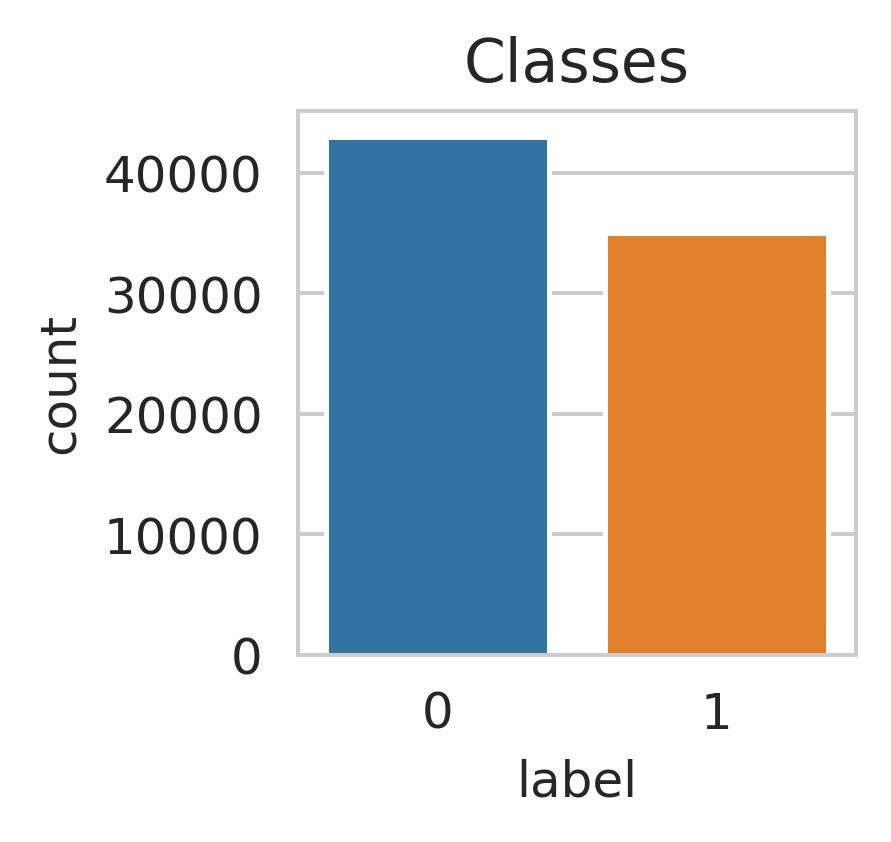

In [ ]:
# Check if the dataset is balanced or not.
plt.figure(figsize=(2, 2))
sns.countplot('label', data=trainingset)
plt.title('Classes')
plt.show()

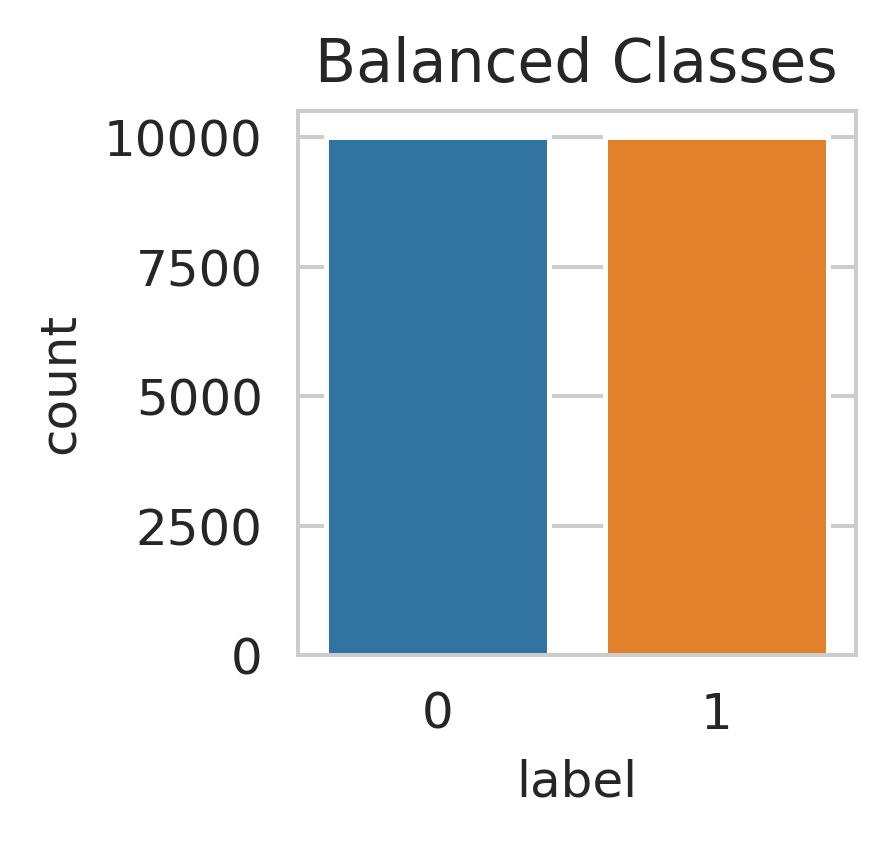

In [ ]:
shuffled_df = trainingset.sample(frac=1,random_state=4) # Shuffle the Dataset.
covid_df = shuffled_df.loc[shuffled_df['label'] == 1].sample(n=10000) # Put all the COVID class in a separate dataset.
non_covid_df = shuffled_df.loc[shuffled_df['label'] == 0].sample(n=10000)#Randomly select n observations from the non-COVID (majority class)
df = pd.concat([covid_df, non_covid_df])# Concatenate both dataframes again

#plot the dataset after the undersampling
plt.figure(figsize=(2, 2))
sns.countplot('label', data=df)
plt.title('Balanced Classes')
plt.show()

In [ ]:
df.to_csv('training dataset.csv')

###train model

In [ ]:
from sklearn.model_selection import train_test_split
import ktrain
from ktrain import text
import pandas as pd

In [ ]:
df = pd.read_csv("Pure COVID and Pure non-COVID tweets (balanced).csv")

In [ ]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(df['text'], df['label'], test_size=0.20, random_state=42)


In [ ]:
train_df_clean = pd.concat([X_train_clean, y_train_clean], axis=1)
print("Shape of training data set: ", train_df_clean.shape)
print("View of data set: ", train_df_clean.head())

Shape of training data set:  (12289, 2)
View of data set:                                                      text  label
2596   coronavirus insurance firms ordered to pay out...      1
7584   coronavirus latest russia suspends repatriatio...      1
573     another virus is sweeping the globe and celeb...      1
5923   coronavirus world map which countries have the...      1
12158  how did a country with an economy the size of ...      0


In [ ]:
eval_df_clean = pd.concat([X_test_clean, y_test_clean], axis=1)
print("Shape of Eval data set: ", eval_df_clean.shape)

Shape of Eval data set:  (3073, 2)


In [ ]:
train_args = {
    'evaluate_during_training': True,
    'logging_steps': 100,
    'num_train_epochs': 2,
    'evaluate_during_training_steps': 100,
    'save_eval_checkpoints': False,
    'train_batch_size': 32,
    'eval_batch_size': 64,
    'overwrite_output_dir': True,
    'fp16': False,
    'wandb_project': "visualization-demo"
}

In [ ]:
model_BERT = ClassificationModel('bert', 'bert-base-uncased', num_labels=2, use_cuda=True, cuda_device=0, args=train_args)

In [ ]:
!pip install wandb

In [ ]:
import wandb

In [ ]:
wandb.login()

In [ ]:
model_BERT.train_model(train_df_clean, eval_df=eval_df_clean)

In [ ]:
result, model_outputs, wrong_predictions = model_BERT.eval_model(eval_df_clean, acc=sklearn.metrics.accuracy_score)

In [ ]:
test_tweet1 = "#tb will spread across U.S. in coming weeks. We’ll get past it, but must focus on limiting the life, and preserving lif"
predictions, _ = model_BERT.predict([test_tweet1])
response_dict = {0: 'non COVID', 1: 'COVID'}
print("Prediction is: ", response_dict[predictions[0]])


Prediction is:  COVID


###run entire dataset

In [ ]:
BBCNews = pd.read_csv("BBCNews.csv")
FinancialTimes = pd.read_csv("FinancialTimes.csv")
Independent = pd.read_csv("Independent.csv")
Telegraph = pd.read_csv("Telegraph.csv")
TheEconomist = pd.read_csv("TheEconomist.csv")
guardiannews = pd.read_csv("guardiannews.csv")
thetimes = pd.read_csv("thetimes.csv")
DailyMailUK = pd.read_csv("DailyMailUK.csv")
DailyMirror = pd.read_csv("DailyMirror.csv")
TheSun = pd.read_csv("TheSun.csv")
itvnews = pd.read_csv("itvnews.csv")
SkyNews = pd.read_csv("SkyNews.csv")
Daily_Express = pd.read_csv("Daily_Express.csv")
GMB = pd.read_csv("GMB.csv")

fulldf = pd.DataFrame()

fulldf = BBCNews
fulldf = fulldf.append(FinancialTimes, ignore_index = True)
fulldf = fulldf.append(Independent, ignore_index = True)
fulldf = fulldf.append(Telegraph, ignore_index = True)
fulldf = fulldf.append(TheEconomist, ignore_index = True)
fulldf = fulldf.append(guardiannews, ignore_index = True)
fulldf = fulldf.append(thetimes, ignore_index = True)
fulldf = fulldf.append(DailyMailUK, ignore_index = True)
fulldf = fulldf.append(DailyMirror, ignore_index = True)
fulldf = fulldf.append(TheSun, ignore_index = True)
fulldf = fulldf.append(itvnews, ignore_index = True)
fulldf = fulldf.append(SkyNews, ignore_index = True)
fulldf = fulldf.append(Daily_Express, ignore_index = True)
fulldf = fulldf.append(GMB, ignore_index = True)

outputdf = fulldf[['tweet', 'hashtags','date','username','nlikes','nreplies','nretweets']]

def remove_content(text):
  text = re.sub(r"http\S+", "", text) #remove urls
  text=re.sub(r'\S+\.com\S+','',text) #remove urls
  text=re.sub(r'\@\w+','',text) #remove mentions
  text =re.sub(r'\#\w+','',text) #remove hashtags
  text = contractions.fix(text) #replace contractions with full forms (eg. don't becomes do not)
  text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
  text = text.lower() #converts to lower case
  text = re.sub(r'\s+',' ', text) #remove extra white space
  return text

#calling the function
outputdf['cleaned_tweets']=outputdf['tweet'].apply(lambda x: remove_content(x))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
predictions, raw_outputs = model_BERT.predict(outputdf['cleaned_tweets'])

In [ ]:
outputdf['target']=predictions

In [ ]:
outputdf.head()

In [ ]:
outputdf.to_csv("OutputClassification.csv",header=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###save model in pickle

In [ ]:
import pickle

In [ ]:
Pkl_Filename = "model_BERT.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_BERT, file)

In [ ]:
from google.colab import files
files.download('model_BERT.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###load model in pickle

In [ ]:
Pkl_Filename = "model_BERT.pkl"  

with open(Pkl_Filename, 'rb') as file:  
    model_BERT = pickle.load(file)

model_BERT

###Life Vs Econ

####selecting economy tweets from covid tweets

In [ ]:
COVIDdf = pd.read_csv("COVID tweets (1,43,223).csv")

In [ ]:
LifeVsEcon = COVIDdf[COVIDdf['cleaned_tweets'].str.contains("economy|recession")]
len(LifeVsEcon)

1767

In [ ]:
LifeVsEcon.to_csv('LifeVsEcon.csv')
from google.colab import files
files.download('LifeVsEcon.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####training BERT for LifeVsEcon

In [ ]:
df = pd.read_csv("LifeVsEcon training data.csv")

In [ ]:
from sklearn.model_selection import train_test_split
import ktrain
from ktrain import text
import pandas as pd

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(df['cleaned_tweets'], df['LifeVsEcon or not'], test_size=0.10, random_state=42)

In [ ]:
train_df_clean = pd.concat([X_train_clean, y_train_clean], axis=1)
print("Shape of training data set: ", train_df_clean.shape)
print("View of data set: ", train_df_clean.head())

Shape of training data set:  (77, 2)
View of data set:                                         cleaned_tweets  LifeVsEcon or not
67   how worried are you that this is going to tur...                  0
61           saturday s mirror lockdown meltdown via                   0
64   why is not the uk testing travellers on arrival                   0
53  if the coronavirus lockdown leads to a fall in...                  1
73  coronavirus care home visits delayed over lack...                  0


In [ ]:
eval_df_clean = pd.concat([X_test_clean, y_test_clean], axis=1)
print("Shape of Eval data set: ", eval_df_clean.shape)

Shape of Eval data set:  (9, 2)


In [ ]:
train_args = {
    'evaluate_during_training': True,
    'logging_steps': 100,
    'num_train_epochs': 2,
    'evaluate_during_training_steps': 100,
    'save_eval_checkpoints': False,
    'train_batch_size': 32,
    'eval_batch_size': 64,
    'overwrite_output_dir': True,
    'fp16': False,
    'wandb_project': "visualization-demo"
}

In [ ]:
model_BERT = ClassificationModel('bert', 'bert-base-uncased', num_labels=2, use_cuda=True, cuda_device=0, args=train_args)

In [ ]:
!pip install wandb

In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
model_BERT.train_model(train_df_clean, eval_df=eval_df_clean)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:304: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: amankabra (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.10.2
wandb: Run data is saved locally in wandb/run-20200921_054211-11a1so9x
wandb: Syncing run peach-cloud-11


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:776: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [ ]:
result, model_outputs, wrong_predictions = model_BERT.eval_model(eval_df_clean, acc=sklearn.metrics.accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:776: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


wandb: Waiting for W&B process to finish, PID 2967
wandb: Program ended successfully.


wandb:                                                                                
wandb: Find user logs for this run at: wandb/run-20200921_054211-11a1so9x/logs/debug.log
wandb: Find internal logs for this run at: wandb/run-20200921_054211-11a1so9x/logs/debug-internal.log
wandb: Run summary:
wandb:   global_step 6
wandb:            tp 1
wandb:            tn 3
wandb:            fp 3
wandb:            fn 2
wandb:           mcc -0.15811388300841897
wandb:    train_loss 0.5110138654708862
wandb:     eval_loss 0.7570984363555908
wandb:         _step 1
wandb:      _runtime 69
wandb:    _timestamp 1600667001
wandb: Run history:
wandb:   global_step ▁█
wandb:            tp █▁
wandb:            tn ▁█
wandb:            fp █▁
wandb:            fn ▁█
wandb:           mcc ▁█
wandb:    train_loss █▁
wandb:     eval_loss ▁█
wandb:         _step ▁█
wandb:      _runtime ▁█
wandb:    _timestamp ▁█
wandb: Synced 5 W&B file(s), 1 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: 
wandb: Sy

In [ ]:
test_tweet1 = "Economy carries more importance than life"
predictions, _ = model_BERT.predict([test_tweet1])
response_dict = {0: 'No', 1: 'Yes'}
print("Prediction is: ", response_dict[predictions[0]])


Prediction is:  No


####predicting LifeVsEcon on entire dataset

In [ ]:
outputdf = pd.read_csv("OutputClassification.csv")

In [ ]:
predictions, raw_outputs = model_BERT.predict(outputdf['cleaned_tweets'])

In [ ]:
outputdf['LifeVsEcon or not']=predictions

In [ ]:
outputdf = outputdf[outputdf['target']==1]
outputdf.to_csv("Outputdf.csv",header=True)

###Life Vs Life

In [ ]:
df = pd.read_csv("LifeVsLife training data.csv",encoding= 'unicode_escape')

In [ ]:
def remove_content(text):
  text = re.sub(r"http\S+", "", text) #remove urls
  text=re.sub(r'\S+\.com\S+','',text) #remove urls
  text=re.sub(r'\@\w+','',text) #remove mentions
  text =re.sub(r'\#\w+','',text) #remove hashtags
  text = contractions.fix(text) #replace contractions with full forms (eg. don't becomes do not)
  text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
  text = text.lower() #converts to lower case
  text = re.sub(r'\s+',' ', text) #remove extra white space
  return text

#calling the function
df['cleaned_tweets']=df['Text'].apply(lambda x: remove_content(x))

In [ ]:
from sklearn.model_selection import train_test_split
import ktrain
from ktrain import text
import pandas as pd

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(df['cleaned_tweets'], df['Label'], test_size=0.05, random_state=42)

In [ ]:
train_df_clean = pd.concat([X_train_clean, y_train_clean], axis=1)
print("Shape of training data set: ", train_df_clean.shape)
print("View of data set: ", train_df_clean.head())

Shape of training data set:  (191, 2)
View of data set:                                          cleaned_tweets  Label
150  possible coronavirus cluster investigated in g...      0
166   we know that employers have gone to huge leng...      0
78   lavishing extensive resources on a single pati...      1
195  sweden s light touch response to coronavirus h...      0
200  newspaper headlines new isolation rule and mad...      0


In [ ]:
eval_df_clean = pd.concat([X_test_clean, y_test_clean], axis=1)
print("Shape of Eval data set: ", eval_df_clean.shape)

Shape of Eval data set:  (11, 2)


In [ ]:
train_args = {
    'evaluate_during_training': True,
    'logging_steps': 100,
    'num_train_epochs': 2,
    'evaluate_during_training_steps': 100,
    'save_eval_checkpoints': False,
    'train_batch_size': 32,
    'eval_batch_size': 64,
    'overwrite_output_dir': True,
    'fp16': False,
    'wandb_project': "visualization-demo"
}

In [ ]:
model_BERT = ClassificationModel('bert', 'bert-base-uncased', num_labels=2, use_cuda=True, cuda_device=0, args=train_args)

In [ ]:
!pip install wndb
import wandb
wandb.login()

ERROR: Could not find a version that satisfies the requirement wndb (from versions: none)
ERROR: No matching distribution found for wndb


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
model_BERT.train_model(train_df_clean, eval_df=eval_df_clean)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:338: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


wandb: W&B API key is configured (use `wandb login --relogin` to force relogin)


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:810: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [ ]:
result, model_outputs, wrong_predictions = model_BERT.eval_model(eval_df_clean, acc=sklearn.metrics.accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:810: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


global_step,12
tp,6
tn,5
fp,0
fn,0
mcc,1.0
train_loss,0.28798
eval_loss,0.34548
_step,1
_runtime,69
_timestamp,1601444630


global_step,▁█
tp,▁▁
tn,▁█
fp,█▁
fn,▁▁
mcc,▁█
train_loss,█▁
eval_loss,█▁
_step,▁█
_runtime,▁█
_timestamp,▁█


In [ ]:
outputdf = pd.read_csv("COVID tweets (1,43,223).csv")

In [ ]:
predictions, raw_outputs = model_BERT.predict(outputdf['cleaned_tweets'])

In [ ]:
outputdf['LifeVsLife or not']=predictions

In [ ]:
outputdf = outputdf[outputdf['LifeVsLife or not']==1]
outputdf.to_csv("Outputdf.csv",header=True)